In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from P3_module import weighted_die
from P3_module import two_dim_ising
from P3_module import two_dim_ising2
from P3_module import two_dim_ising3

# 1. Weighted Die

Your winnings after 10000 rolls are: $8154
Friend winnings after 10000 rolls are: $1846


Text(0.5, 1.0, 'Histogram of Die Rolls')

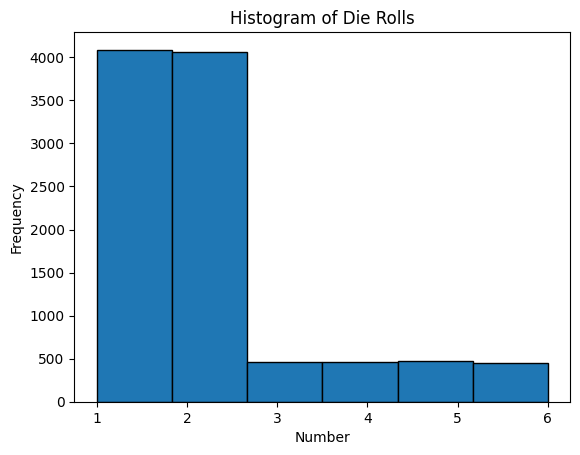

In [2]:
num_steps = int(1e4)
numbers, my_money, friend_money = weighted_die(num_steps)
print(f'Your winnings after {num_steps} rolls are: ${my_money}')
print(f'Friend winnings after {num_steps} rolls are: ${friend_money}')

plt.hist(numbers, bins=6, edgecolor='black')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Histogram of Die Rolls')

# 2. 2D Ising Model

Le there be a 2D Ising model on an $N = L\times L$ periodic lattice in the absence of an external magnetic field.  Periodicity of the lattice means that if the lattice configuration is represented as an array $s_{ij}$ of spins:

\begin{align}
    \begin{pmatrix}
        s_{00} & \cdots & s_{0, L-1} \\
        \vdots & \ddots & \vdots \\
        s_{L-1,0} & \cdots & s_{L-1, L-1} \\
    \end{pmatrix}
\end{align}

Mean internal energy $U$, 
magnetization $M$, specific heat $C_H$, and magnetic susceptibility $\chi_T$ (per lattice site) on the temperature are defined as:

\begin{align}
U& = \frac{1}{N}\langle E\rangle ,& M& = \frac{1}{N}\langle S\rangle ,\\
\chi_T& = \frac{1}{NT}\left(\langle S^2\rangle  - \langle S\rangle^2\right),&
C_H& = \frac{1}{NT^2}\left(\langle E^2\rangle - \langle E\rangle^2\right),
\end{align}

where $N=L^2$ is the total number of sites, and $S = \sum_i s_i$ is the net magnetization. 

In [3]:
# DOUBTS
# 1. When calculating E, does si*sj mean chosen s * neighbor?
# 2. When calculating initial S, do we sum over entire lattice?
# 3. To avoid looping over the lattice, do we add delta E to previous E 

## 2.1. Plotting time series' of intensive quantities

As you run your MCMC simulation, you should find that the 
for larger system size, the Monte Carlo simulation needs to run longer steps, to reach equilibrium.  In order to monitor the convergence of values of observables during the simulation, it is helpful to plot their values as a function of time step.  In order to make the benchmarking a fair game, the "updating step per site" is defined as follows:

\begin{align}
    t=\frac{\text{Total updates}}{\text{numbers of sites}}
\end{align}

**What you need to do:**

- Choose system sizes $L = 16, 32$ and a temperature of your choosing not to close to the critical temperature, and run the simulation.  Plot $U$ and $M$ as functions of $t$, the update step per site defined above.  
- Roughly how long does it seem to take for the simulation to converge?  
- Does the time it takes seem to depend on the system size?

In [4]:
# Initialize kwargs
L1 = 16
L2 = 32
temp = 10. #K
steps = int(1e6)

Text(0.5, 0.98, 'Time Series of Intensive Quantities for Lattice with L = 16')

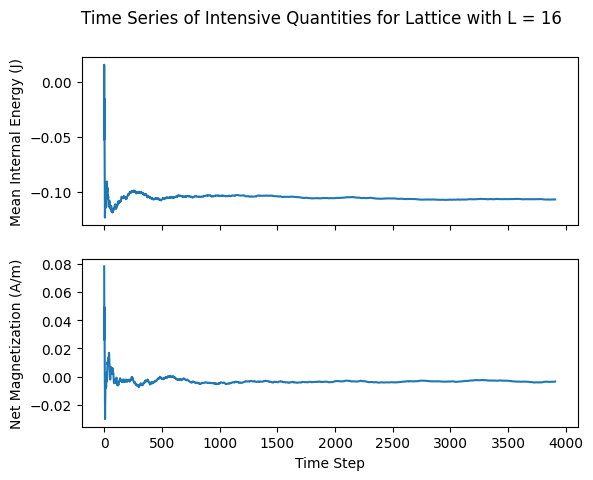

In [5]:
# 1. L = 16
lattice1, U1, M1, t1 = two_dim_ising(L1, temp, steps)

fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(t1, U1)
axs[1].plot(t1, M1)

axs[0].set_ylabel('Mean Internal Energy (J)')
axs[1].set_ylabel('Net Magnetization (A/m)')
axs[1].set_xlabel('Time Step')
fig.suptitle(f'Time Series of Intensive Quantities for Lattice with L = {L1}')

Text(0.5, 0.98, 'Time Series of Intensive Quantities for Lattice with L = 32')

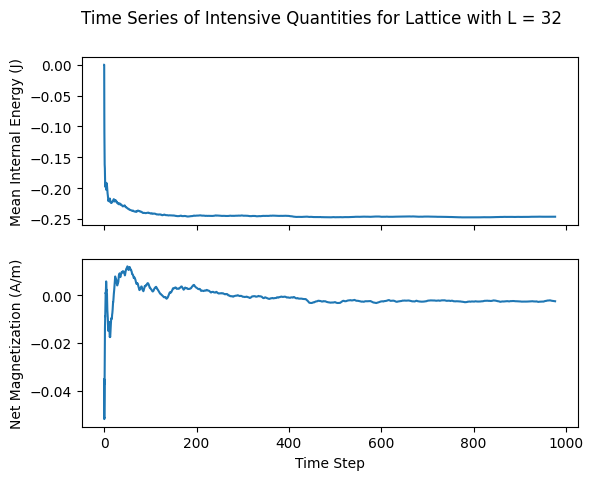

In [6]:
# 2. L = 32
lattice2, U2, M2, t2 = two_dim_ising(L2, temp, steps)

fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(t2, U2)
axs[1].plot(t2, M2)

axs[0].set_ylabel('Mean Internal Energy (J)')
axs[1].set_ylabel('Net Magnetization (A/m)')
axs[1].set_xlabel('Time Step')
fig.suptitle(f'Time Series of Intensive Quantities for Lattice with L = {L2}')

## 2.2. Magnetization curves for different lattice sizes

Onsager's exact solution gives the following result for the magnetization as a function of temperature:

\begin{align}
M(T)& = \begin{cases}\Bigl[1 - \sinh^{-4}\bigl(2/T\bigr)\Bigr]^{1/8},& T<T_c\\
0,& T\geq T_c
\end{cases}
\end{align}

obtained in the thermodynamic limit $N\to\infty$. 

**What you need to do:**

- Consider system sizes $L = 8, 16, 32, 64$. 
- For each size, generate an $M(T)$ curve.  Plot these 4 curves, together with the exact curve, *in the same plot.* - We suggest you start the simulations at a high temperature above the critical point $T_c$  and slowly cool the ferromagnet by decreasing the temperature in small steps. After each update of $T$, perform a large number of iterations with the Metropolis-Hastings algorithm without calculating the ensemble averages. Once the system is close to thermal equilibrium start drawing the samples from the equilibrium distribution and calculate the averages along the way.

**Notes:**

- These are computationally expensive calculations.
- There are 4 curves for different system sizes.
- Each curve is made of many dots. (you decide the spacing of temperatures)
- Each dot is an averaged magnetization per site at a given temperature

In [7]:
# Generate range of temperatures
temps = np.linspace(5., -4., 20)
L1 = 8
L2 = 16
L3 = 32
L4 = 64

# 1. L = 8
L1_S = []
for temp in temps:
    if temp == temps[0]:
        new_lattice, S = two_dim_ising2(L1, temp, int(1e6))
        S = np.abs(S)
        L1_S.append(S)
    else:
        new_lattice, S = two_dim_ising2(L1, temp, int(1e5), new_lattice)
        S = np.abs(S)
        L1_S.append(S)

# 2. L = 16
L2_S = []
for temp in temps:
    if temp == temps[0]:
        new_lattice, S = two_dim_ising2(L2, temp, int(1e6))
        S = np.abs(S)
        L2_S.append(S)
    else:
        new_lattice, S = two_dim_ising2(L2, temp, int(1e5), new_lattice)
        S = np.abs(S)
        L2_S.append(S)

# 3. L = 32
L3_S = []
for temp in temps:
    if temp == temps[0]:
        new_lattice, S = two_dim_ising2(L3, temp, int(1e6))
        S = np.abs(S)
        L3_S.append(S)
    else:
        new_lattice, S = two_dim_ising2(L3, temp, int(1e5), new_lattice)
        S = np.abs(S)
        L3_S.append(S)

# 4. L = 64
L4_S = []
for temp in temps:
    if temp == temps[0]:
        new_lattice, S = two_dim_ising2(L4, temp, int(1e7))
        S = np.abs(S)
        L4_S.append(S)
    else:
        new_lattice, S = two_dim_ising2(L4, temp, int(1e7), new_lattice)
        S = np.abs(S)
        L4_S.append(S)

/var/folders/sd/dvrn_zvj6tn9vjpb8gc1x_k00000gn/T/ipykernel_88663/902960505.py:5: RuntimeWarning: invalid value encountered in double_scalars
  else: return (1-(np.sinh(2/temp))**-4)**(1/8)


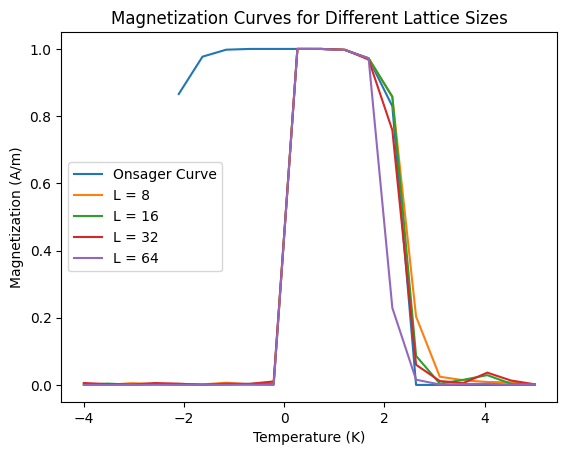

In [8]:
# Generate analytical solution
def onsager_curve(temp):
    T_c = 2.2692 #K
    if temp >= T_c: return 0
    else: return (1-(np.sinh(2/temp))**-4)**(1/8)

# Plot everything
plt.plot(temps, [onsager_curve(temp) for temp in temps], label='Onsager Curve')
plt.plot(temps, L1_S, label=f'L = {L1}')
plt.plot(temps, L2_S, label=f'L = {L2}')
plt.plot(temps, L3_S, label=f'L = {L3}')
plt.plot(temps, L4_S, label=f'L = {L4}')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization (A/m)')
plt.title(f'Magnetization Curves for Different Lattice Sizes')
plt.legend()

## 2.3. Typical spin configuration at different temperatures

Once the energy and magnetization have come to equilibrium in your simulation, you can look at the configuration of the system to see what a typical configuration of the system looks like in thermal equilibrium.  One way to do this is to make a plot of the whole array of spins with a black or white square representing spin up or spin down.

**What you need to do:**

- Choose your system size to be $L = 256$.  
- Make sure to run your simulation for enough time steps, until the system is in equilibrium.
- Plot three pictures of spin configuration, at temperature $T=1.8$, $T=2.3$, $T=4.0$.  Your pictures should display the grid of spins with either a black or white square at a given site depending on whether the site is in a spin up state or a spin down state.
- Comment on how the patterns differ at different temperatures and what they might physically tell us about how the system behaves at temperatures below, near, and above the critical temperature.

In [9]:
L = 256
T1 = 1.8 #K
T2 = 2.3 #K
T3 = 4.0 #K
T_c = 2.2692 #K
steps = int(1e6)

lat1 = two_dim_ising3(L, T1, steps)
lat2 = two_dim_ising3(L, T2, steps)
lat3 = two_dim_ising3(L, T3, steps)

Text(0.5, 1.0, 'T/$T_c$ = 1.76')

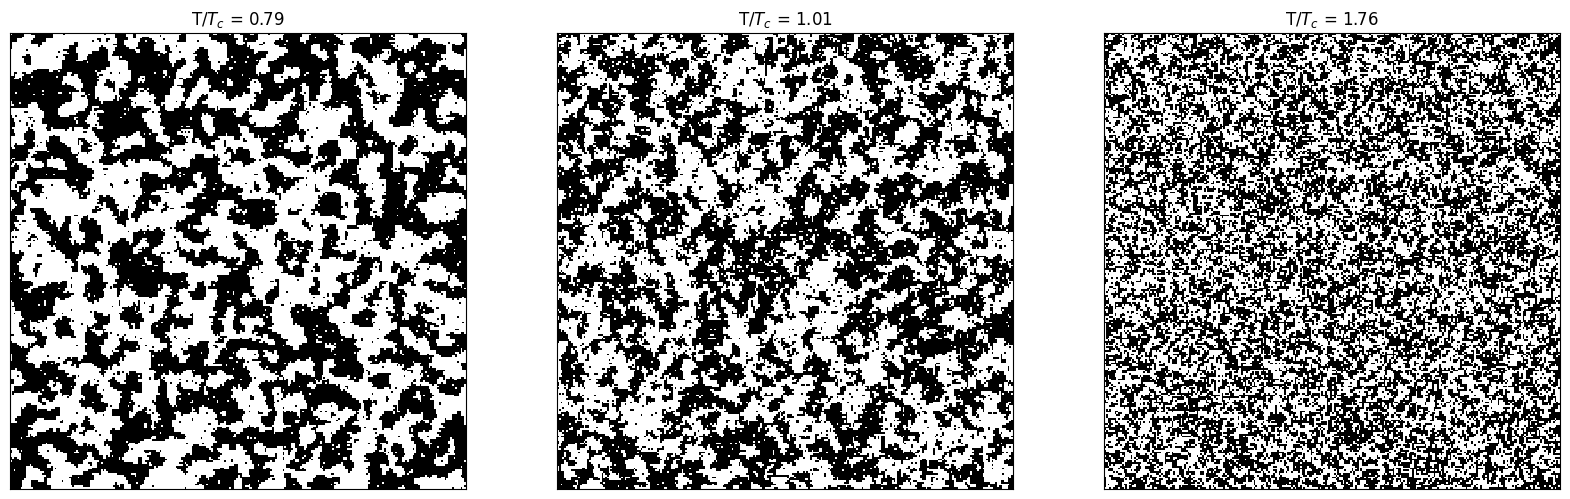

In [10]:
# Plot everything
fig, axs = plt.subplots(1, 3, figsize=(20,20))

axs[0].matshow(lat1, cmap='gray')
axs[0].tick_params(left = False, right = False, top=False, labeltop=False,
                   labelleft = False, labelbottom = False, bottom = False) 
axs[1].matshow(lat2, cmap='gray', )
axs[1].tick_params(left = False, right = False, top=False, labeltop=False,
                   labelleft = False, labelbottom = False, bottom = False) 
axs[2].matshow(lat3, cmap='gray')
axs[2].tick_params(left = False, right = False, top=False, labeltop=False,
                   labelleft = False, labelbottom = False, bottom = False) 

axs[0].set_title(f'T/$T_c$ = {T1/T_c:.2f}')
axs[1].set_title(f'T/$T_c$ = {T2/T_c:.2f}')
axs[2].set_title(f'T/$T_c$ = {T3/T_c:.2f}')

# In the plots below, s = +1 is indicated by black and s = -1 is indicated by white!

At temperatures lower than the critical temperature, there is a dominance of one spin (s = +1 here) with clusters of the different states. Near the critical temperature, there are less clusters and above it, there is no discernible pattern of states and the orientation of spins is truly random. This could be due to the fact that as temperature decreases, the entropy decreases and so the spins are more likely to align with each other. As a result, the material has a higher chance to magnetize at lower temperatures.